In [2]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [3]:
country_list={'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark',
 'Estonia', 'Finland', 'France', 'Germany' ,'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 
 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovenia', 
 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey'}

In [4]:
df = pd.read_csv('COVID-19_vaccination_rates.csv') 
df=df.loc[(df["date"]=="2021-10-25")]#.loc[(df["location"].isin(country_list))] # select date and countries
df=df[["location","people_fully_vaccinated_per_hundred"]] # reduce to countries and percentage of vaccinated ppl
df.rename(columns={'location': 'Country Name'}, inplace=True)
df=df.loc[(df["people_fully_vaccinated_per_hundred"]==df["people_fully_vaccinated_per_hundred"])]
df

,Country Name,people_fully_vaccinated_per_hundred
568,Africa,5.53
901,Albania,30.57
2713,Argentina,55.56
3219,Aruba,71.37
3578,Asia,41.54
...,...,...
65140,Vietnam,22.23
65472,Wales,70.69
65732,Wallis and Futuna,49.25
66097,World,37.62


In [10]:
df0 = pd.read_csv('gdp_per_capita.csv') 
df0=df0[["Country Name","2020"]] # select countries and reduce to gdp
df0.rename(columns={'2020': 'gdp_per_capita_2020'}, inplace=True)
df0=df0.loc[(df0["gdp_per_capita_2020"]==df0["gdp_per_capita_2020"])]

In [11]:
data = pd.merge(df0, df, on=["Country Name"])
data

,Country Name,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Albania,13899.933981,30.57
1,Argentina,20762.991679,55.56
2,Australia,52397.387048,61.01
3,Austria,55648.874565,62.03
4,Azerbaijan,14474.313361,42.29
...,...,...,...
87,Vanuatu,3009.733927,9.72
88,World,17082.787590,37.62
89,Samoa,6766.228447,39.27
90,South Africa,13355.598709,19.48


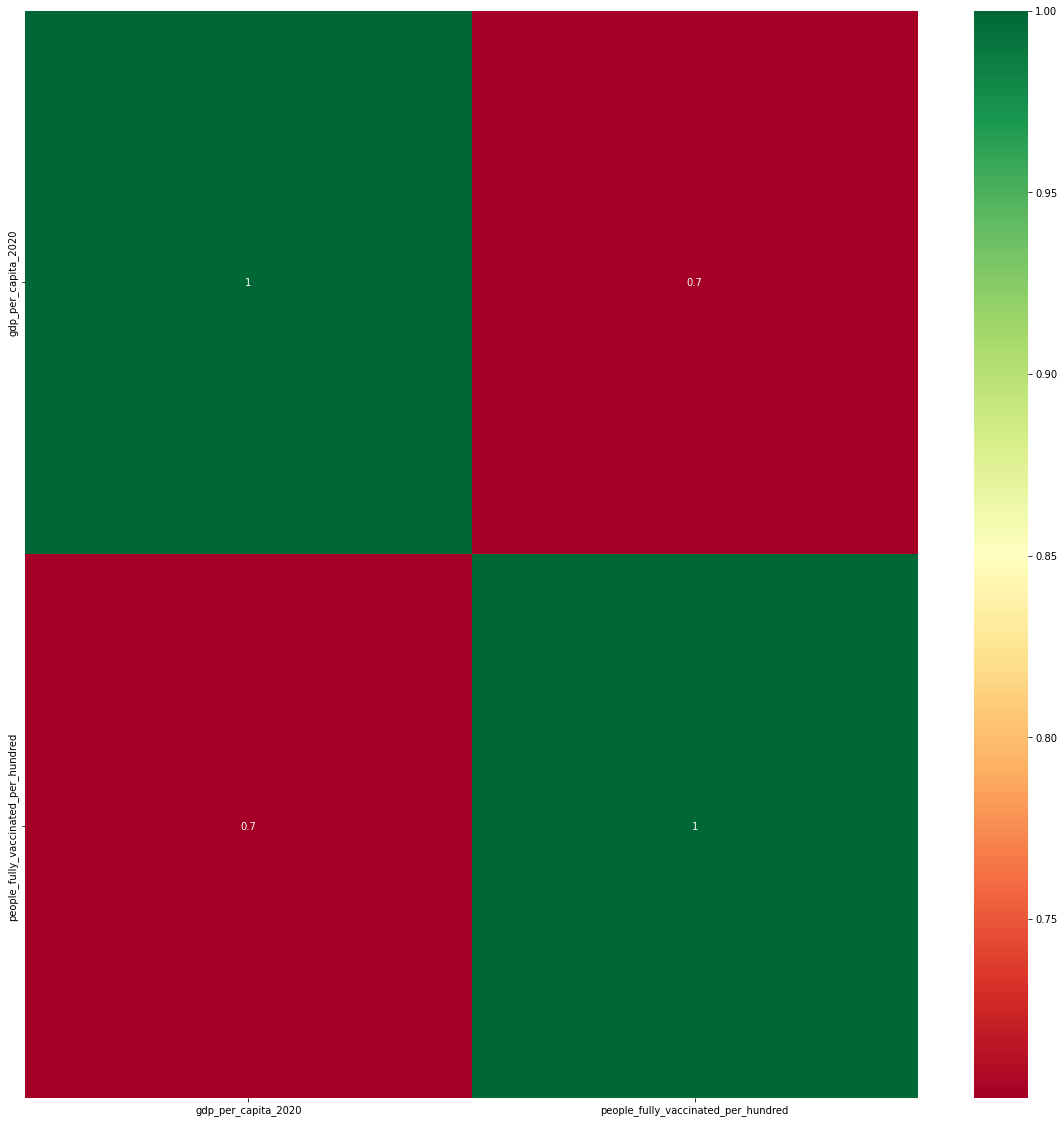

In [12]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['gdp_per_capita_2020', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [27]:
#trust_ingovernment_2019
df0 = pd.read_csv('trust_in_government.csv')  
df0 = df0.loc[(df0["TIME"]==2019)][["LOCATION","Value"]]
df0.rename(columns={"Value": "trust_ingovernment_2019"}, inplace=True) #40
df1 = pd.read_csv('betterlifeindex_2019.csv')[["LOCATION","Country"]]

data = pd.merge(df0, df1, on=["LOCATION"]).drop_duplicates().reset_index()
data.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(df, data, on=["Country Name"])
data

,Country Name,people_fully_vaccinated_per_hundred,index,LOCATION,trust_ingovernment_2019
0,Australia,61.01,0,AUS,46.870001
1,Austria,62.03,59,AUT,51.233826
2,Belgium,73.63,121,BEL,32.790115
3,Brazil,52.13,1728,BRA,34.085009
4,Canada,73.73,183,CAN,54.928097
5,Chile,76.72,1768,CHL,15.252345
6,Colombia,40.42,1825,COL,32.798110
7,Denmark,75.72,245,DNK,63.299903
8,Estonia,56.70,1869,EST,40.330654
9,Finland,68.51,307,FIN,63.918815


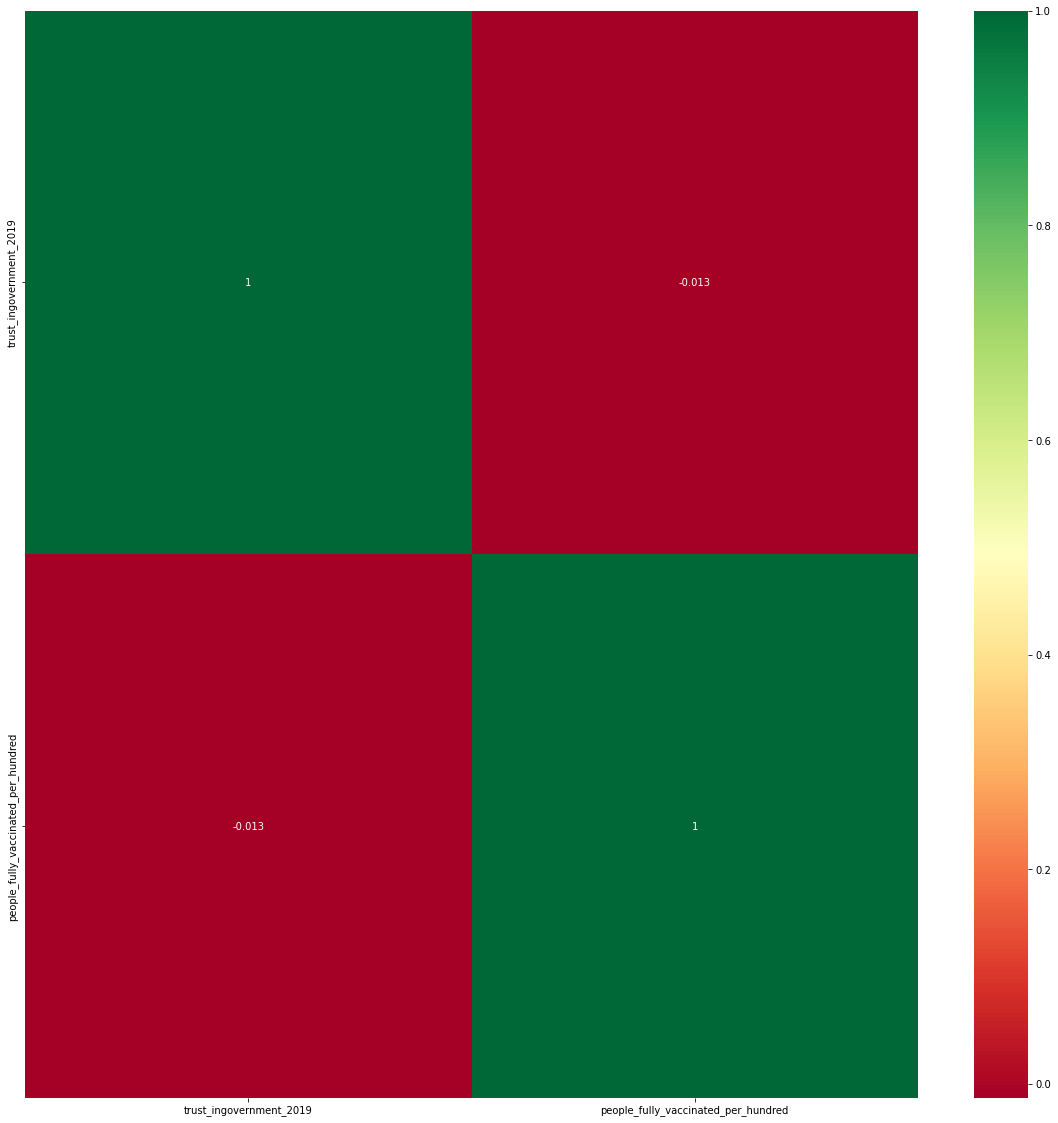

In [28]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['trust_ingovernment_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [30]:
df4 = pd.read_csv('secondary_education.csv')  
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="UPPSRY")][["LOCATION","Value"]]
df4.rename(columns={"Value": "secondary_education_2019"}, inplace=True)
data = pd.merge(df4, df1, on=["LOCATION"]).drop_duplicates().reset_index()
data.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(df, data, on=["Country Name"])
data

,Country Name,people_fully_vaccinated_per_hundred,index,LOCATION,secondary_education_2019
0,Austria,62.03,0,AUT,77.636
1,Belgium,73.63,62,BEL,77.047
2,Brazil,52.13,1551,BRA,65.083
3,Canada,73.73,124,CAN,84.317
4,Chile,76.72,1591,CHL,90.132
5,Colombia,40.42,1648,COL,77.038
6,Denmark,75.72,243,DNK,81.629
7,Estonia,56.70,1692,EST,80.195
8,Finland,68.51,305,FIN,84.907
9,Germany,65.77,369,DEU,73.092


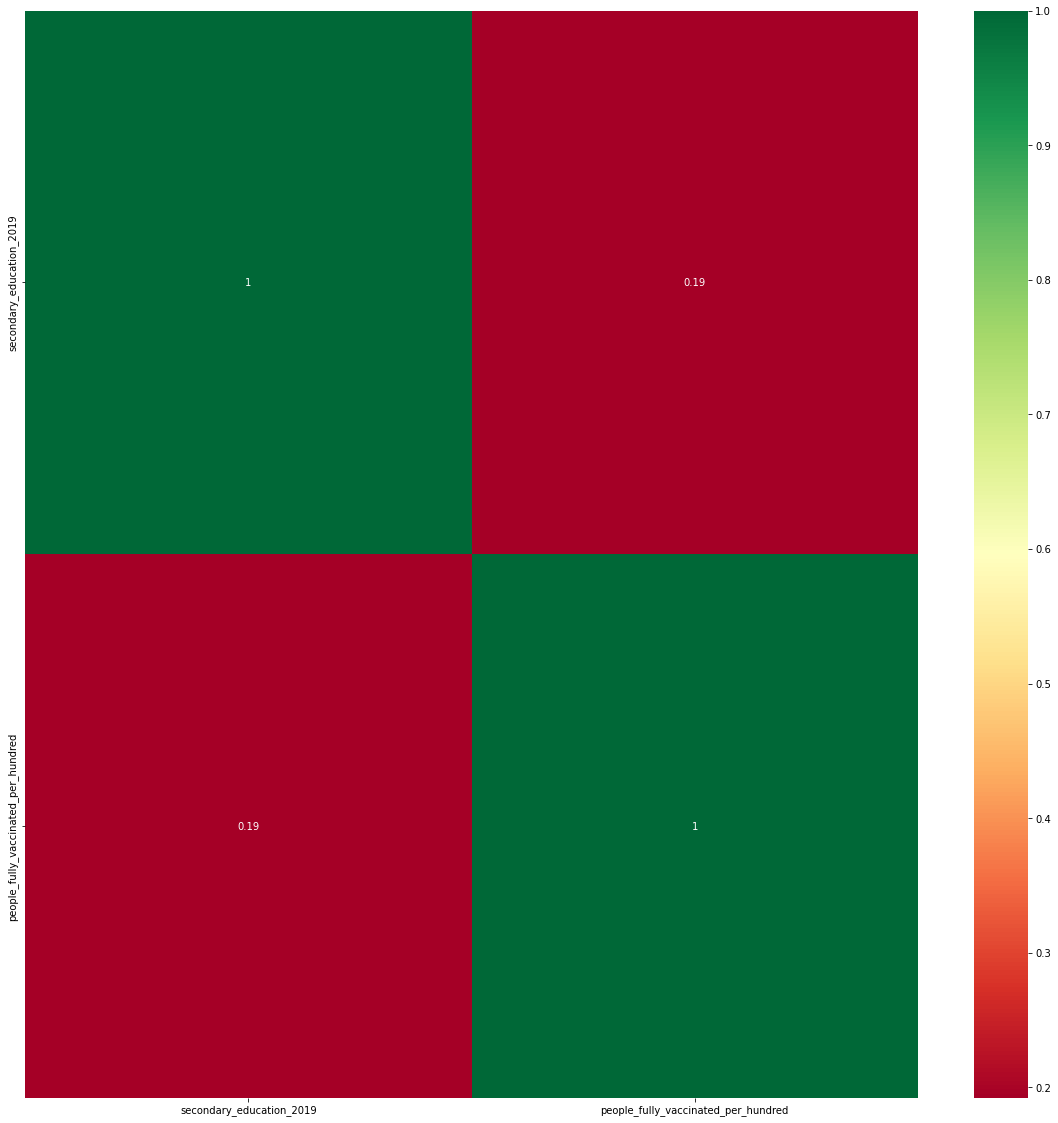

In [31]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['secondary_education_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [45]:
df4 = pd.read_csv('tertiary_education.csv')[["LOCATION","SUBJECT", "TIME", "Value"]]
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="BACHR_MEN")|(df4["SUBJECT"]=="BACHR_WOMEN")]
df4.rename(columns={"Value": "tertiary_education_2019"}, inplace=True)


df4 = df4.pivot(index="LOCATION", columns="SUBJECT", values="tertiary_education_2019")
df4['tertiary_education_2019'] = df4["BACHR_MEN"] + df4['BACHR_WOMEN']
df4 = df4["tertiary_education_2019"].to_frame()
df4 = df4.reset_index() 
data = pd.merge(df4, df1, on=["LOCATION"]).drop_duplicates().reset_index()
data.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(df, data, on=["Country Name"])
data


,Country Name,people_fully_vaccinated_per_hundred,index,LOCATION,tertiary_education_2019
0,Australia,61.01,0,AUS,69.343
1,Austria,62.03,59,AUT,37.418
2,Belgium,73.63,121,BEL,80.736
3,Chile,76.72,234,CHL,52.185
4,Denmark,75.72,410,DNK,81.471
5,Estonia,56.70,534,EST,54.380
6,Finland,68.51,598,FIN,72.916
7,Germany,65.77,348,DEU,64.156
8,Greece,61.20,724,GRC,75.157
9,Hungary,59.39,784,HUN,37.610


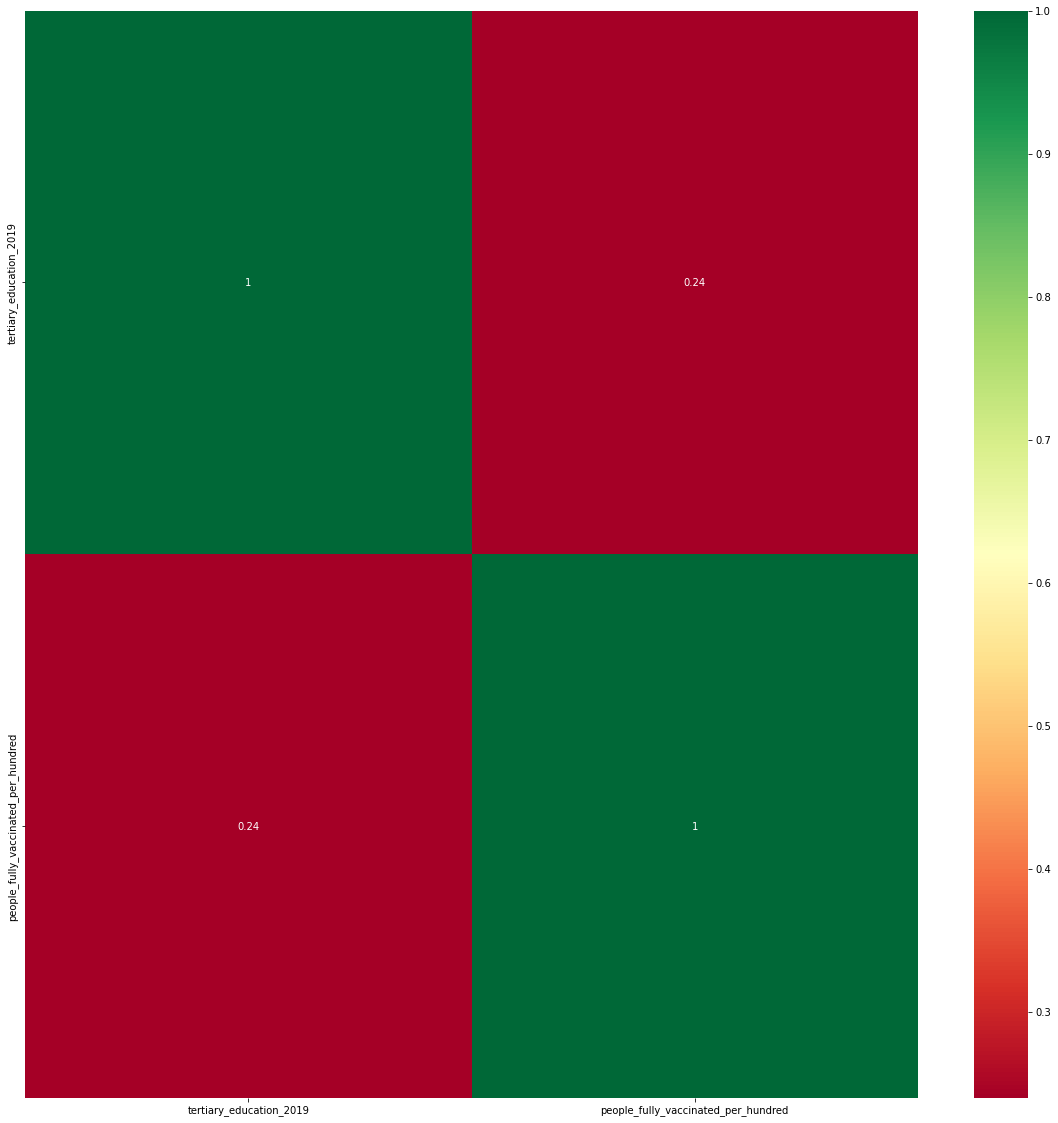

In [46]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['tertiary_education_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [49]:
df1 = pd.read_csv('unemployment_rate.csv') 
df1 = df1[["Country Name","2020"]] # select and reduce
df1.rename(columns={"2020": "unemplyment_2020"}, inplace=True)
df1=df1.loc[(df1["unemplyment_2020"]==df1["unemplyment_2020"])]
data = pd.merge(df1, df, on=["Country Name"])
data

,Country Name,unemplyment_2020,people_fully_vaccinated_per_hundred
0,Albania,11.700000,30.57
1,Argentina,11.670000,55.56
2,Australia,6.610000,61.01
3,Austria,5.770000,62.03
4,Azerbaijan,6.270000,42.29
...,...,...,...
88,Vanuatu,1.950000,9.72
89,World,6.471281,37.62
90,Samoa,8.870000,39.27
91,South Africa,28.740000,19.48


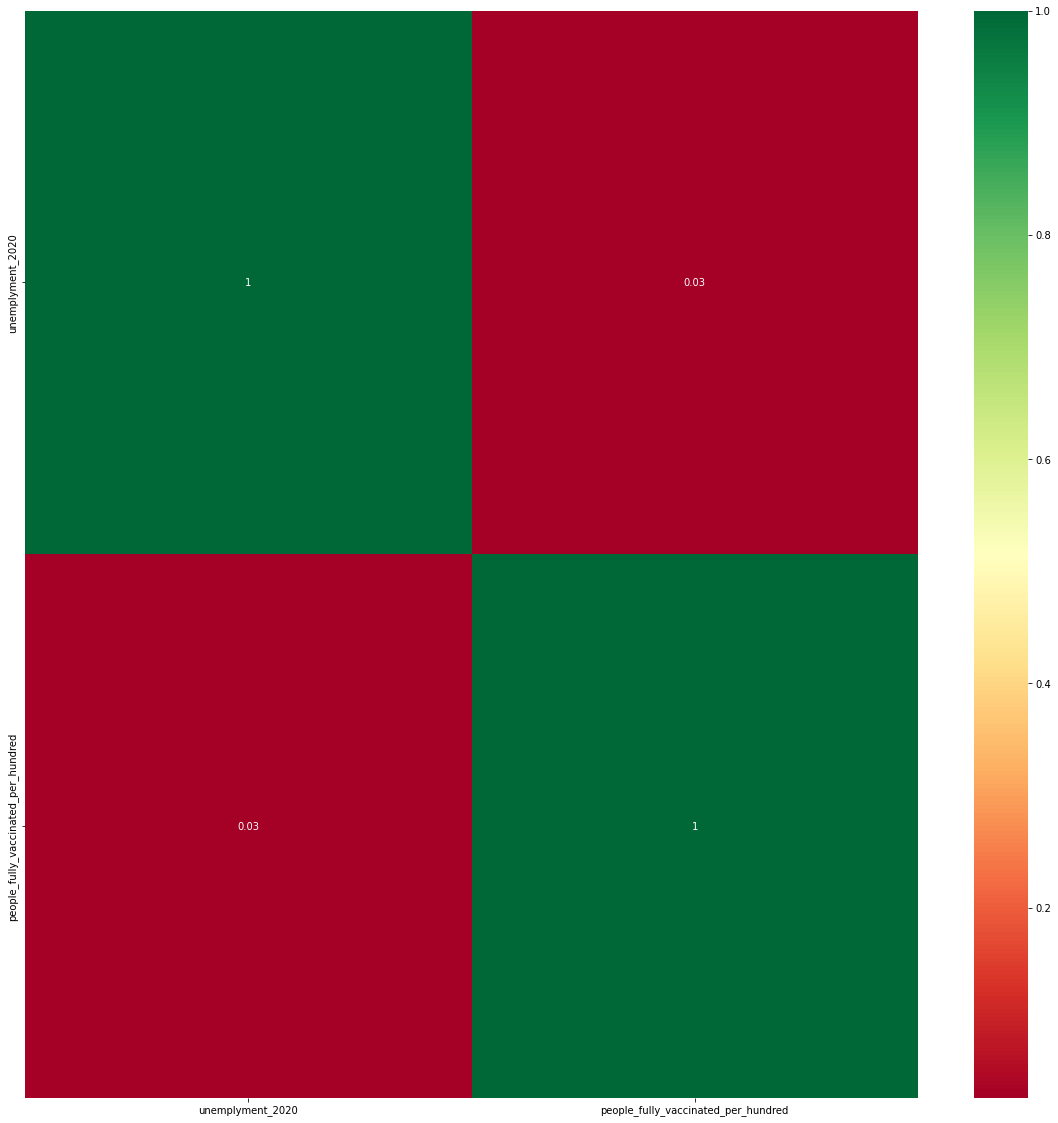

In [50]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['unemplyment_2020', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [75]:
df7 = pd.read_csv('betterlifeindex_2019.csv') 
df7 = df7.loc[(df7["Indicator"]=="Voter turnout")][["Country", "Value"]]
df7.rename(columns={"Value": "Voter_turnout_2019"}, inplace=True)
df7.rename(columns={"Country": "Country Name"}, inplace=True)
dat = pd.merge(df, df7, on="Country Name")
dat

,Country Name,people_fully_vaccinated_per_hundred,Voter_turnout_2019
0,Australia,61.01,91.0
1,Austria,62.03,80.0
2,Belgium,73.63,89.0
3,Brazil,52.13,79.0
4,Canada,73.73,68.0
5,Chile,76.72,47.0
6,Colombia,40.42,53.0
7,Denmark,75.72,86.0
8,Estonia,56.70,64.0
9,Finland,68.51,67.0


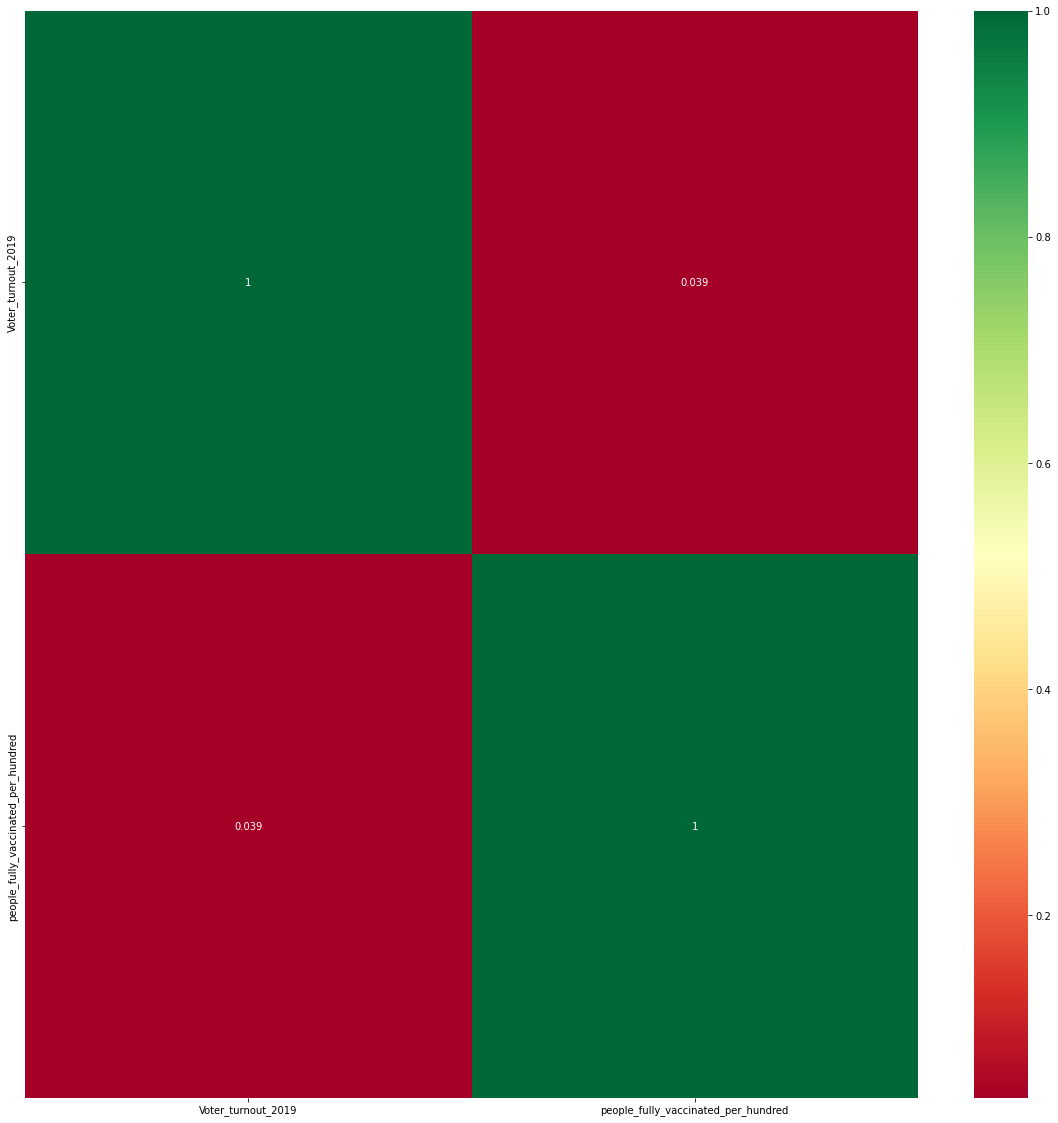

In [76]:
corrmat = dat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat[['Voter_turnout_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")


In [4]:
df0 = pd.read_csv('gdp_per_capita.csv') 
df0=df0[["Country Name","2020"]] # select countries and reduce to gdp
df0.rename(columns={'2020': 'gdp_per_capita_2020'}, inplace=True)
df0

,Country Name,gdp_per_capita_2020
0,Aruba,NaN
1,Africa Eastern and Southern,3677.111255
2,Afghanistan,2077.874554
3,Africa Western and Central,4240.534782
4,Angola,6443.032680
...,...,...
261,Kosovo,11383.404733
262,"Yemen, Rep.",NaN
263,South Africa,13355.598709
264,Zambia,3456.322534


In [5]:
df1 = pd.read_csv('unemployment_rate.csv') 
df1 = df1[["Country Name","2020"]] # select and reduce
df1.rename(columns={"2020": "unemplyment_2020"}, inplace=True)
df1

,Country Name,unemplyment_2020
0,Aruba,NaN
1,Africa Eastern and Southern,6.814177
2,Afghanistan,11.730000
3,Africa Western and Central,6.300105
4,Angola,7.700000
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",13.420000
263,South Africa,28.740000
264,Zambia,12.170000


In [6]:
df2 = pd.read_csv('political_regime.csv')   ## we only have democracy anyways... Not enough data for not else
df2 = df2.loc[(True==pd.isnull(df2["end yr"]))][["Country","Regime type"]]
#df2 = df2.rename(columns={"Country": "Country "}, inplace=True)
df2

,Country,Regime type
6,Afghanistan,personal
8,Albania,democracy
10,Algeria,military
11,Angola,sparty
20,Argentina,democracy
...,...,...
506,NaN,NaN
507,NaN,NaN
508,NaN,NaN
509,NaN,NaN


In [7]:
df3 = pd.read_csv('trust_in_government.csv')  
df3 = df3.loc[(df3["TIME"]==2019)][["LOCATION","Value"]]
df3.rename(columns={"Value": "trust_ingovernment_2019"}, inplace=True)
df3["LOCATION"].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
       'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'BRA', 'CHL', 'COL', 'CRI', 'EST', 'ISR', 'LVA',
       'LTU', 'RUS', 'SVN', 'ZAF'], dtype=object)

In [8]:
df4 = pd.read_csv('secondary_education.csv')  
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="UPPSRY")][["LOCATION","Value"]]
df4.rename(columns={"Value": "secondary_education_2019"}, inplace=True)
df4

,LOCATION,secondary_education_2019
9,AUT,77.636
33,BEL,77.047
50,CAN,84.317
79,CZE,80.510
104,DNK,81.629
137,FIN,84.907
164,DEU,73.092
180,GRC,91.409
203,HUN,77.257
232,ISL,80.011


In [9]:
df5 = pd.read_csv('tertiary_education.csv')[["LOCATION","SUBJECT", "TIME", "Value"]]
df5 = df5.loc[(df5["TIME"]==2019)].loc[(df5["SUBJECT"]=="BACHR_MEN")|(df5["SUBJECT"]=="BACHR_WOMEN")]
df5.rename(columns={"TIME": "tertiary_education_2019"}, inplace=True)
df5 = df5.pivot(index="LOCATION", columns="SUBJECT", values="Value")
df5['tertiary_education_2019'] = df5["BACHR_MEN"] + df5['BACHR_WOMEN']
df5 = df5["tertiary_education_2019"].to_frame()
df5 = df5.reset_index()  
df5

,LOCATION,tertiary_education_2019
0,AUS,69.343
1,AUT,37.418
2,BEL,80.736
3,CHE,72.556
4,CHL,52.185
5,CZE,50.212
6,DEU,64.156
7,DNK,81.471
8,ESP,63.931
9,EST,54.380


In [5]:
df6 = pd.read_csv('worldwide_covid_data.csv')                                 
df6.rename(columns={"Country": "Country Name"}, inplace=True)
df6 = df6[["Country Name","Deaths/1M population"]]
df6

,Country Name,Deaths/1M population
0,Afghanistan,182
1,Albania,1034
2,Algeria,133
3,Andorra,1679
4,Angola,50
...,...,...
191,Venezuela,176
192,Vietnam,230
193,Yemen,62
194,Zambia,192


In [11]:
data1 = pd.merge(df, df0, on="Country Name")
data1 = pd.merge(data1, df1, on="Country Name")
#data = pd.merge(data, df2, on="Country Name")  ## sowieso alles Demokratien
data1 = pd.merge(data1, df6, on="Country Name")

data1

,Country Name,people_fully_vaccinated_per_hundred,gdp_per_capita_2020,unemplyment_2020,Deaths/1M population
0,Australia,61.01,52397.387048,6.61,71
1,Austria,62.03,55648.874565,5.77,1273
2,Belgium,73.63,52626.581638,6.01,2247
3,Brazil,52.13,14829.890417,13.67,2842
4,Canada,73.73,48090.992167,9.48,765
5,Chile,76.72,25067.691601,11.51,1959
6,Colombia,40.42,14570.236743,15.44,2472
7,Costa Rica,NaN,21143.342817,17.08,1391
8,Denmark,75.72,60551.640172,5.66,471
9,Estonia,56.70,37925.116799,6.46,1222


In [12]:
data2 = pd.merge(df3, df4, on="LOCATION")
data2 = pd.merge(data2, df5, on="LOCATION")

data2

,LOCATION,trust_ingovernment_2019,secondary_education_2019,tertiary_education_2019
0,AUT,51.233826,77.636,37.418
1,BEL,32.790115,77.047,80.736
2,DNK,63.299903,81.629,81.471
3,FIN,63.918815,84.907,72.916
4,DEU,56.846043,73.092,64.156
5,GRC,39.642462,91.409,75.157
6,HUN,48.393419,77.257,37.610
7,ISL,52.137706,80.011,64.937
8,ITA,22.192586,89.629,59.015
9,LUX,78.017101,72.229,11.467


In [13]:
df7 = pd.read_csv('betterlifeindex_2019.csv')  
df7.rename(columns={"Country": "Country Name"}, inplace=True)
df7 = df7[["LOCATION", "Country Name","Indicator", "Value"]].loc[(df7["Inequality"]=="Total")]
df8 = df7.loc[(df7["Indicator"]=="Life expectancy")][["Country Name", "LOCATION", "Value"]]
df8.rename(columns={"Value": "Life_expectancy_2019"}, inplace=True)
df9 = df7.loc[(df7["Indicator"]=="Homicide rate")][["Country Name", "LOCATION", "Value"]]
df9.rename(columns={"Value": "Homicide_rate_2019"}, inplace=True)
df10 = df7.loc[(df7["Indicator"]=="Life satisfaction")][["Country Name", "LOCATION", "Value"]]
df10.rename(columns={"Value": "Life satisfaction_2019"}, inplace=True)
df11 = df7.loc[(df7["Indicator"]=="Employees working very long hours")][["Country Name", "LOCATION", "Value"]]
df11.rename(columns={"Value": "Employees_working_hours_2019"}, inplace=True)
df12 = df7.loc[(df7["Indicator"]=="Time devoted to leisure and personal care")][["Country Name", "LOCATION", "Value"]]
df12.rename(columns={"Value": "leisure_and_personal_care_2019"}, inplace=True)
df13 = df7.loc[(df7["Indicator"]=="Voter turnout")][["Country Name", "LOCATION", "Value"]]
df13.rename(columns={"Value": "Voter_turnout_2019"}, inplace=True)
df7 = df7.loc[(df7["Indicator"]=="Self-reported health")][["Country Name", "LOCATION", "Value"]]
df7.rename(columns={"Value": "Self-reported_health_2019"}, inplace=True)
df7

,Country Name,LOCATION,Self-reported_health_2019
1636,Australia,AUS,85.0
1637,Austria,AUT,70.0
1638,Belgium,BEL,74.0
1639,Canada,CAN,88.0
1640,Czech Republic,CZE,60.0
1641,Denmark,DNK,71.0
1642,Finland,FIN,70.0
1643,France,FRA,66.0
1644,Germany,DEU,65.0
1645,Greece,GRC,74.0


In [14]:
data3 = pd.merge(df7, df8, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df9, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df10, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df11, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df12, on=["LOCATION","Country Name"])
data3.reset_index()

,index,Country Name,LOCATION,Self-reported_health_2019,Life_expectancy_2019,Homicide_rate_2019,Life satisfaction_2019,Employees_working_hours_2019,leisure_and_personal_care_2019
0,0,Australia,AUS,85.0,82.5,1.1,7.3,13.04,14.35
1,1,Austria,AUT,70.0,81.7,0.5,7.1,6.66,14.55
2,2,Belgium,BEL,74.0,81.5,1.0,6.9,4.75,15.70
3,3,Canada,CAN,88.0,81.9,1.3,7.4,3.69,14.56
4,4,Denmark,DNK,71.0,80.9,0.6,7.6,2.34,15.87
5,5,Finland,FIN,70.0,81.5,1.3,7.6,3.81,15.17
6,6,France,FRA,66.0,82.4,0.5,6.5,7.67,16.36
7,7,Germany,DEU,65.0,81.1,0.5,7.0,4.26,15.62
8,8,Italy,ITA,71.0,83.3,0.6,6.0,4.11,16.47
9,9,New Zealand,NZL,88.0,81.7,1.3,7.3,15.11,14.87


In [15]:
data = pd.merge(data1, data3, on=["Country Name"])
data = pd.merge(data2, data, on=["LOCATION"])
data=data.drop(columns=["Country Name","LOCATION","leisure_and_personal_care_2019"])
data
data=data.drop([9])

X = data[['trust_ingovernment_2019','secondary_education_2019','tertiary_education_2019','gdp_per_capita_2020','unemplyment_2020','Deaths/1M population','Self-reported_health_2019','Life_expectancy_2019','Employees_working_hours_2019']]
Y = data["people_fully_vaccinated_per_hundred"]
X

,trust_ingovernment_2019,secondary_education_2019,tertiary_education_2019,gdp_per_capita_2020,unemplyment_2020,Deaths/1M population,Self-reported_health_2019,Life_expectancy_2019,Employees_working_hours_2019
0,51.233826,77.636,37.418,55648.874565,5.77,1273,70.0,81.7,6.66
1,32.790115,77.047,80.736,52626.581638,6.01,2247,74.0,81.5,4.75
2,63.299903,81.629,81.471,60551.640172,5.66,471,71.0,80.9,2.34
3,63.918815,84.907,72.916,50810.527408,7.83,218,70.0,81.5,3.81
4,56.846043,73.092,64.156,54263.649615,4.31,1157,65.0,81.1,4.26
5,22.192586,89.629,59.015,41890.208794,9.31,2196,71.0,83.3,4.11
6,67.520084,85.911,61.803,44212.876475,4.55,6,88.0,81.7,15.11
7,59.798701,83.578,75.057,63287.607008,4.62,169,77.0,82.5,2.93
8,36.778586,74.744,63.931,38343.155224,15.67,1872,72.0,83.4,4.01
10,56.126091,76.235,60.084,28113.736584,13.92,847,69.0,78.0,32.64


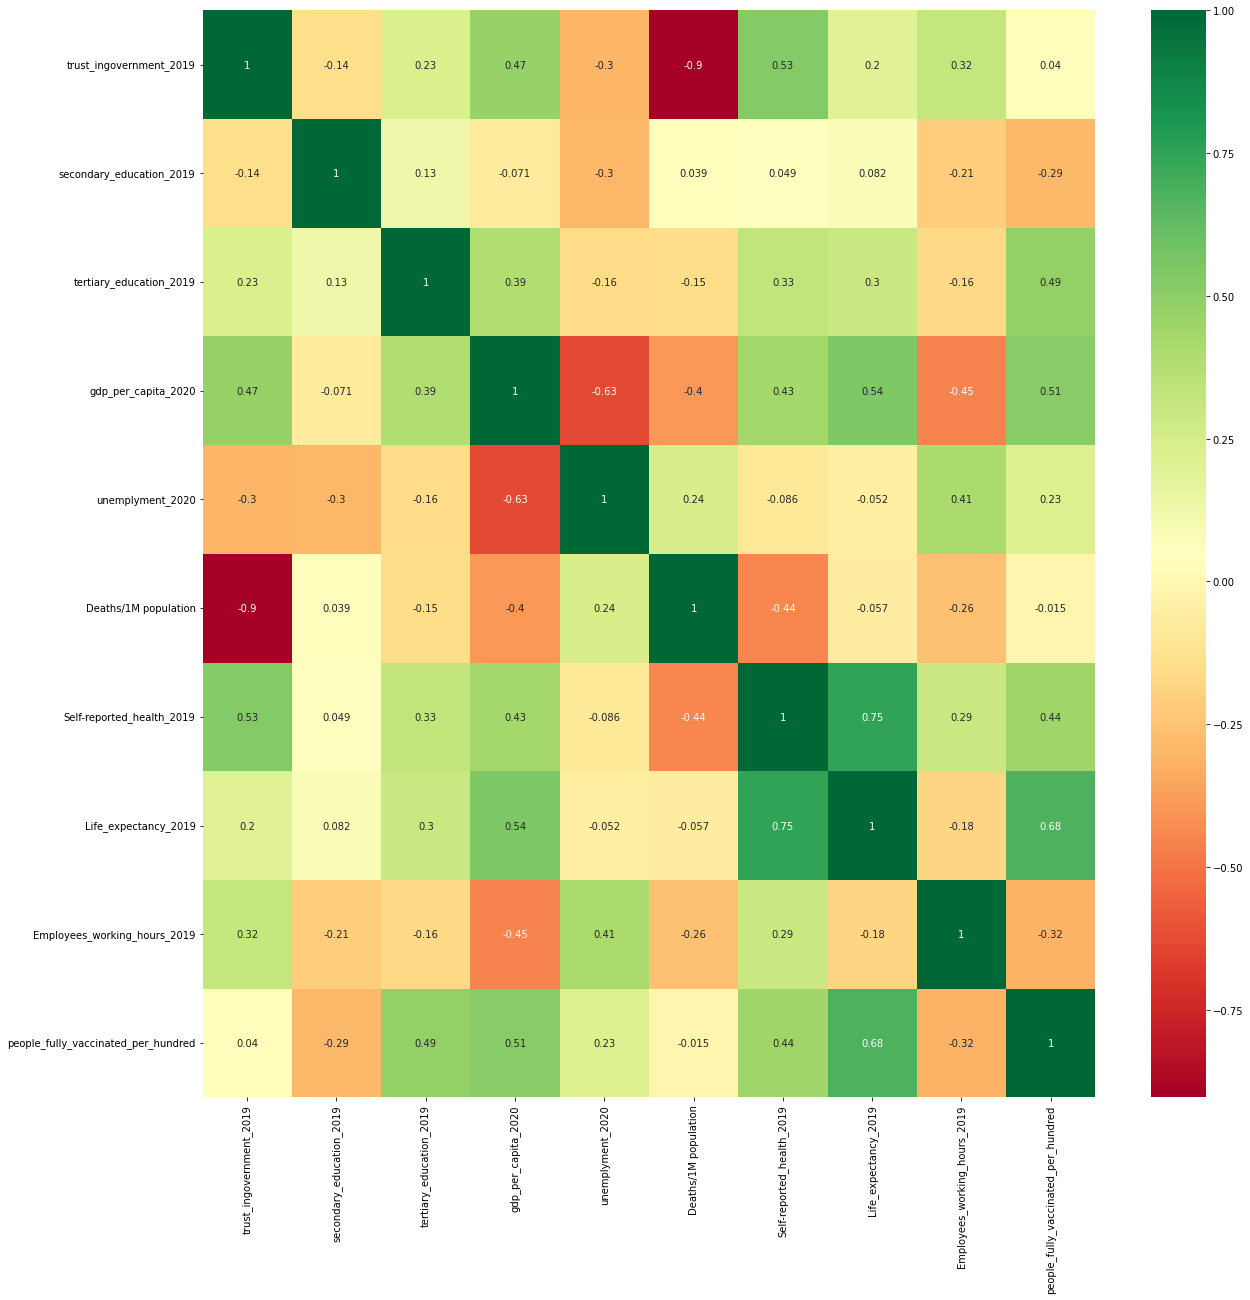

In [19]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['trust_ingovernment_2019','secondary_education_2019','tertiary_education_2019','gdp_per_capita_2020','unemplyment_2020','Deaths/1M population','Self-reported_health_2019','Life_expectancy_2019','Employees_working_hours_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

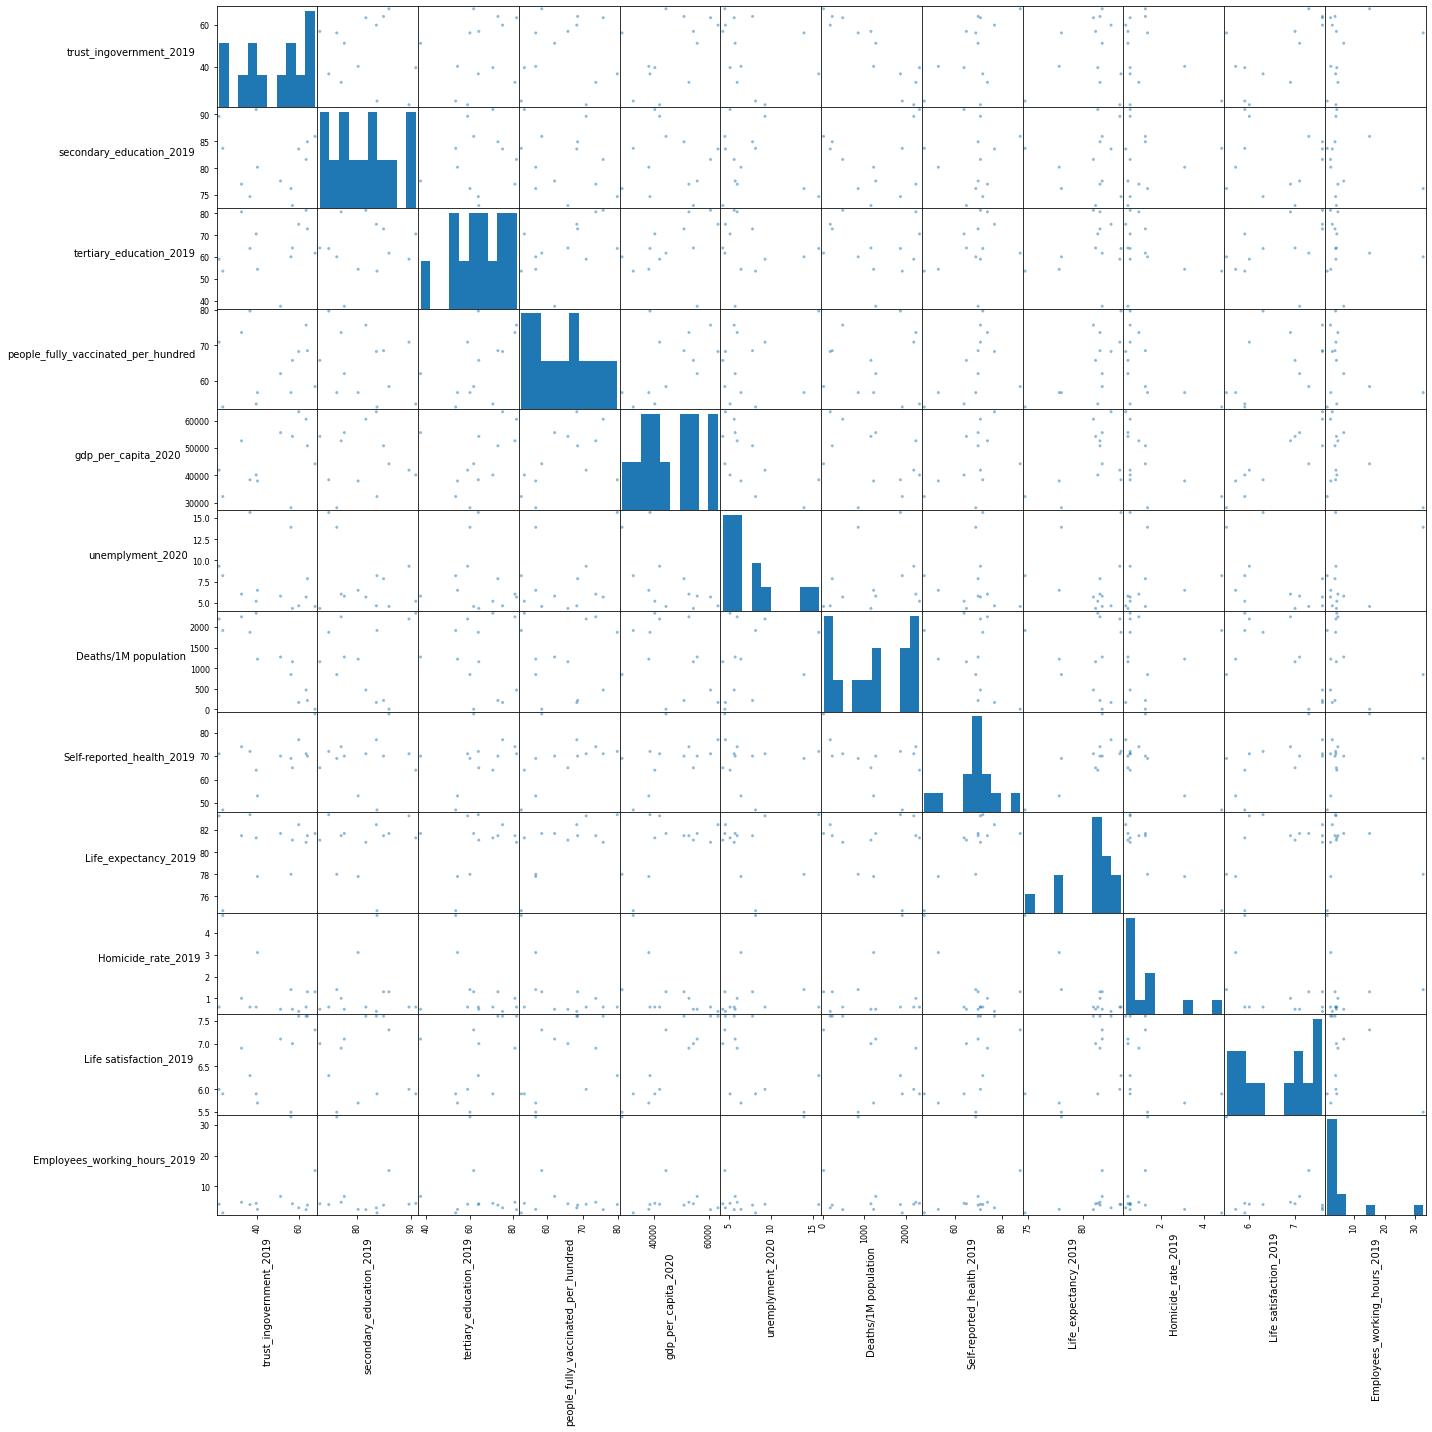

In [24]:
axes = pd.plotting.scatter_matrix(data, figsize=(20,20))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

/home/yasin/Desktop/influences-on-the-covid-19-vaccination-rates/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yasin/Desktop/influences-on-the-covid-19-vaccination-rates/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yasin/Desktop/influences-on-the-covid-19-vaccination-rates/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and

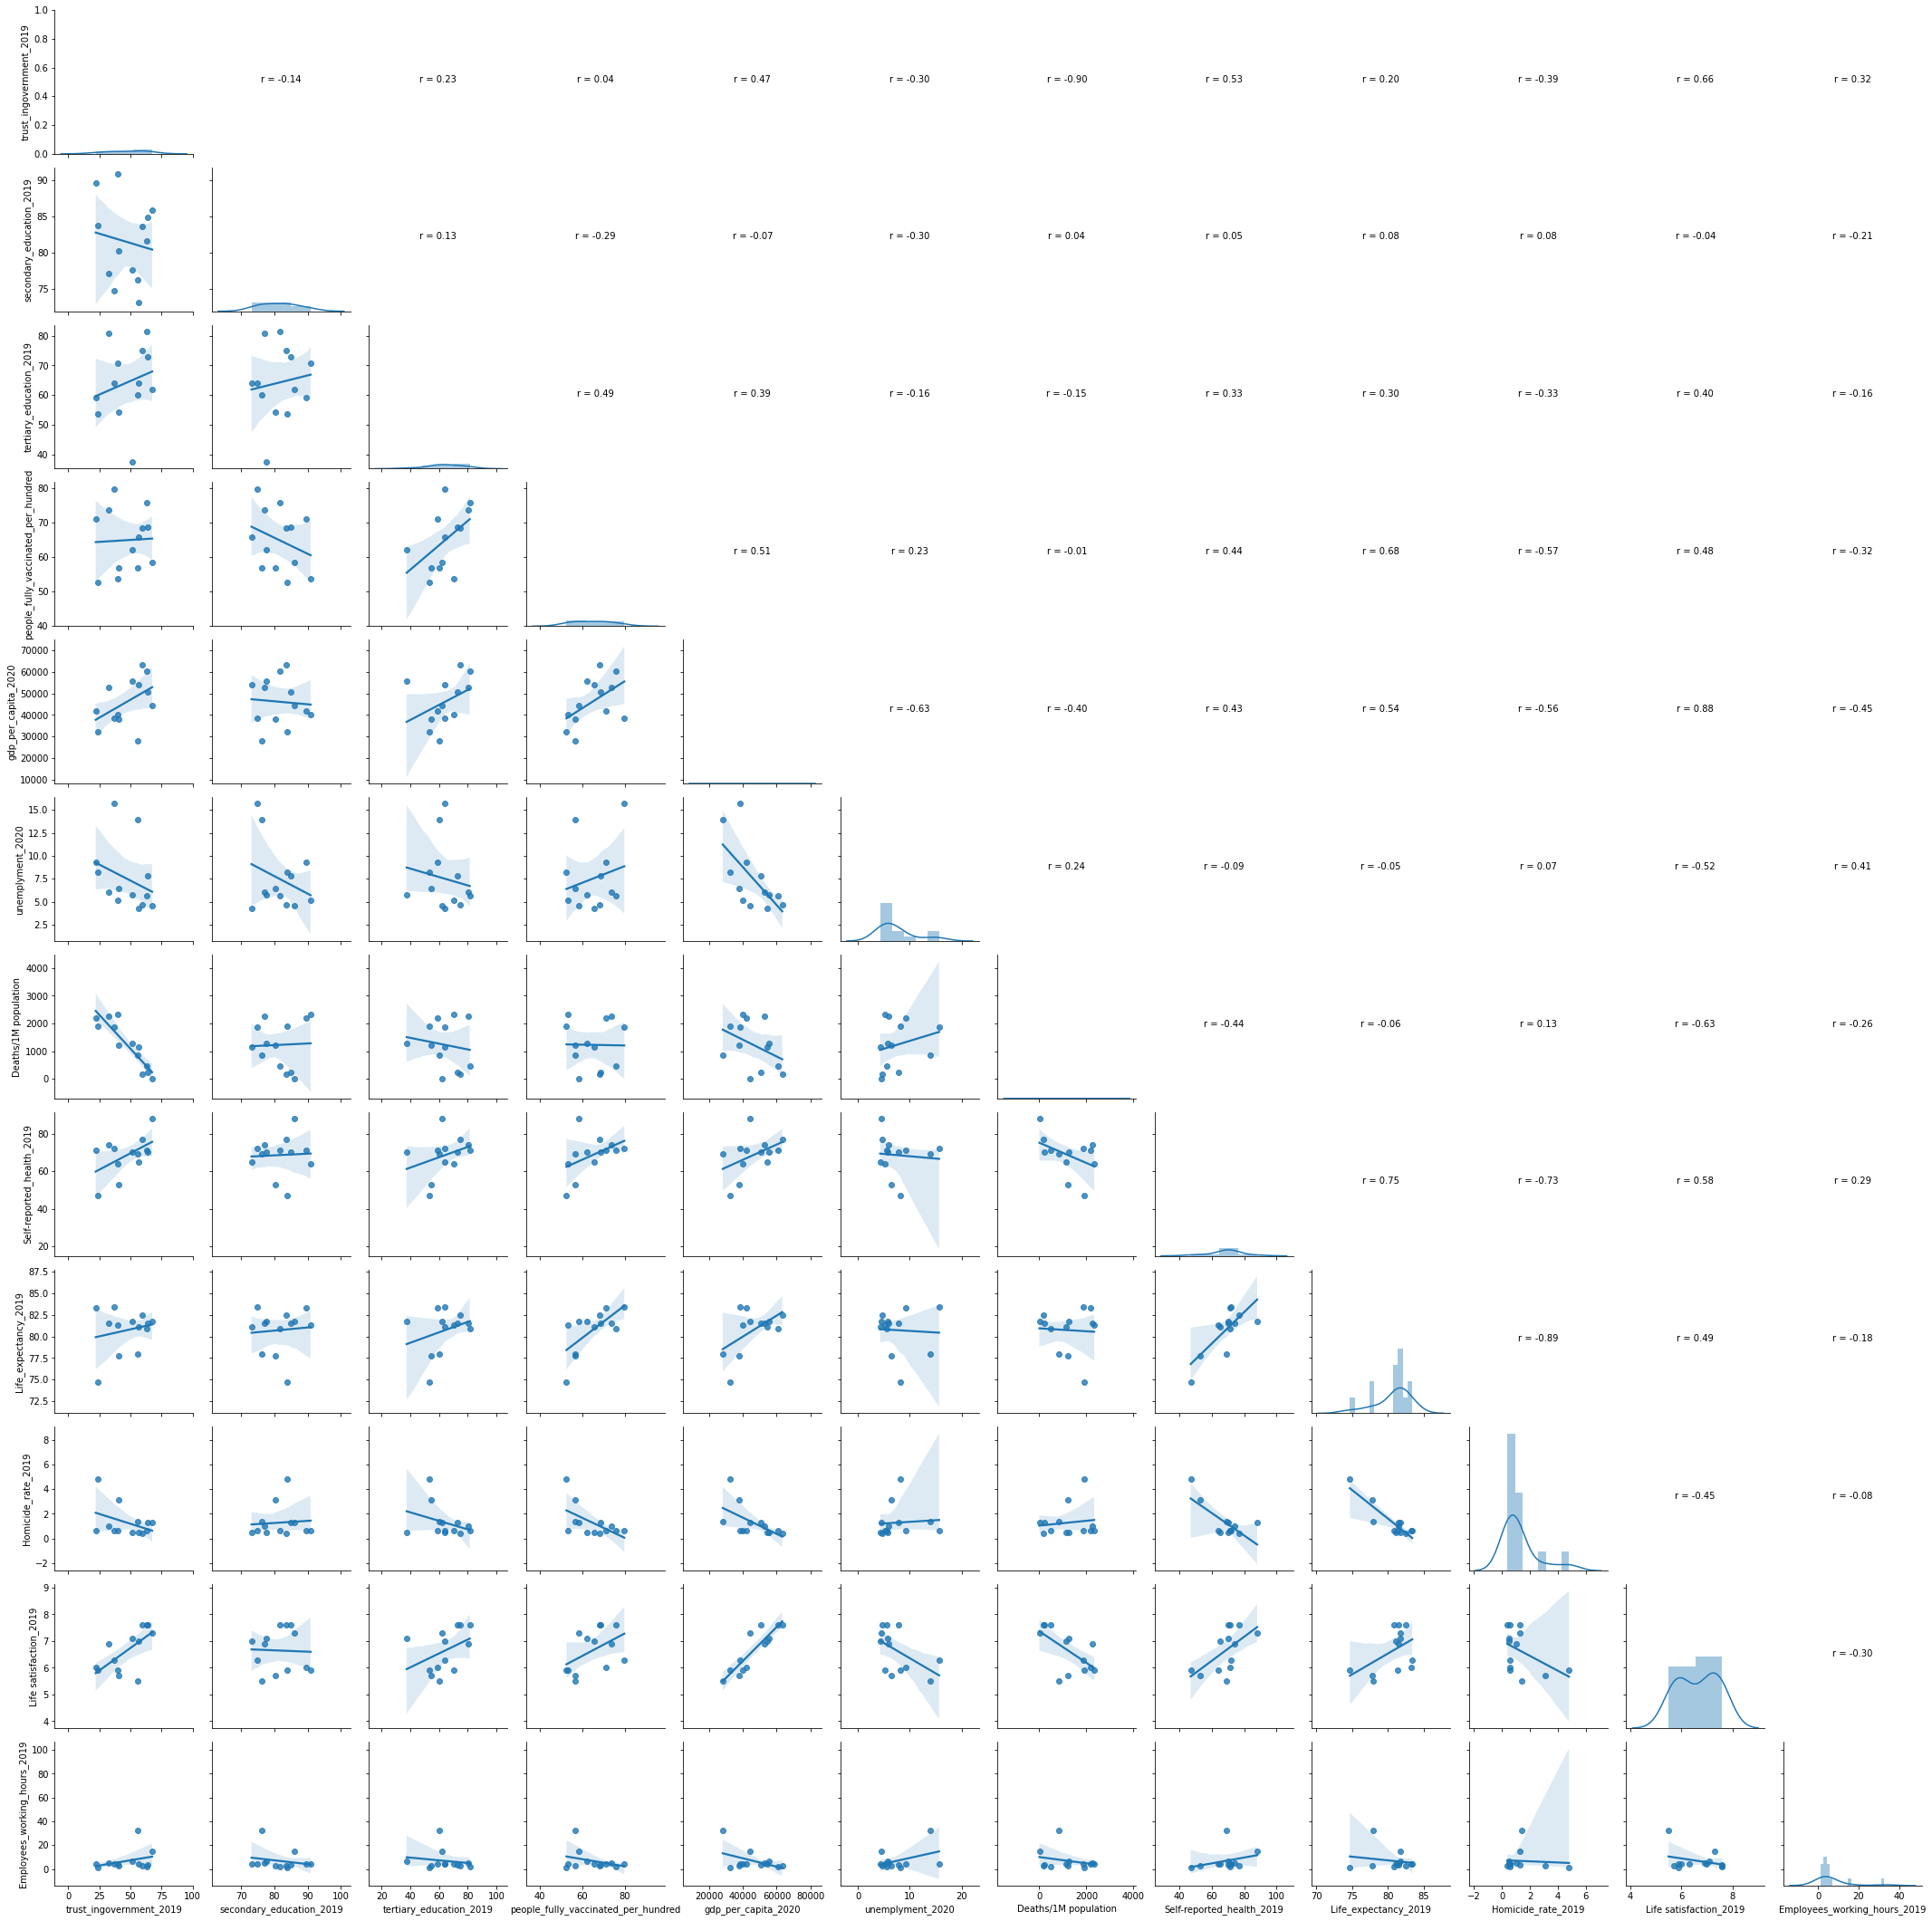

In [25]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(data)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)